In [1]:
# loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# structure of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# rename the column genre 
df.rename({'Genre':'Gender'}, axis=1, inplace=True )

In [5]:
# column names
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# brief statistical summary of the numerical columns
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# duplicated values
df.duplicated().any()

False

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64


Age                       False
Annual Income (k$)         True
CustomerID                False
Gender                    False
Spending Score (1-100)    False
dtype: bool




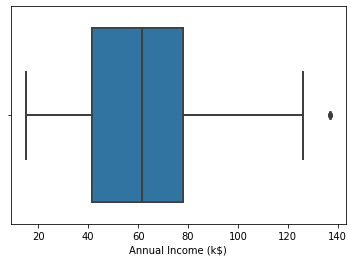

In [8]:
# calculating the IQR
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print(IQR) 

print('\n')

# checking for ouliers
out = ((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any()
print(out)

print('\n')

# display the column with outliers
for col in out.values:
    new = out[out == True].index[0]
    sns.boxplot(x=df[new])

# removing the ouliers
#df = df[~((df < (q1 - 1.5 * IQR))|(df > (q3 + 1.5 * IQR))).any(axis = 1)]


In [9]:
# distribution of the customers according to gender

def bar_gender(df, var):
    
    count = df.groupby(var)[var].count()

    data_frame = pd.DataFrame({var: count.index, 'Count': count.values})

    #Seaborn barplot
    sns.set_style("whitegrid")

    bar,ax = plt.subplots(figsize=(12,8))

    ax = sns.barplot(x = var, y = 'Count', data = data_frame,ci=None, palette="muted",orient='v')

    ax.set_title("Customers "+var+" Comparison", fontsize = 22)

    ax.set_xlabel (var, fontsize = 18)

    ax.set_ylabel ('Count', fontsize = 18)

    # display value
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )
    
    bar.savefig("Gender_bar.png");

    
    return 

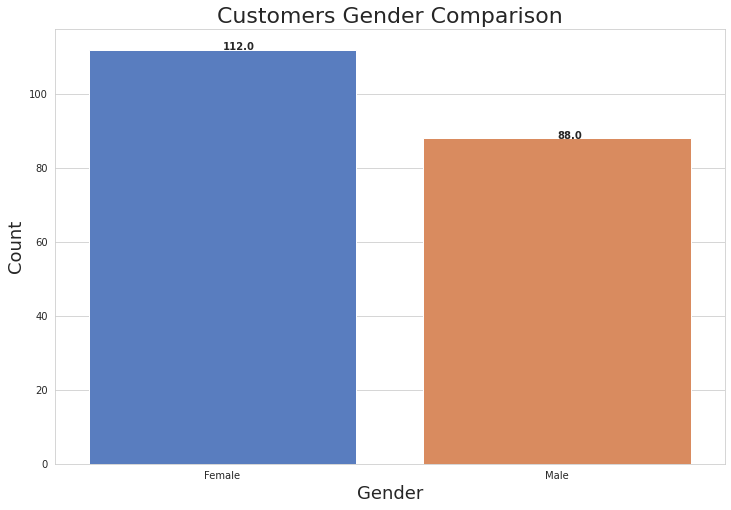

In [10]:
# displaying the bar graph
bar_gender(df, 'Gender')

In [11]:
# plot a pie chart 

def pie_gender(df, var):
    col = df.groupby([var])[var].count()

    sns.axes_style('whitegrid')

    fig, ax = plt.subplots(figsize=(10,8))

    colors = ['lightskyblue', 'red']

    textprops = {'color':'black', 'style':'oblique', 'size':15}

    explode = (0, 0.05)

    ax.pie(col.values, labels = col.index, autopct = '%1.1f%%', shadow = True, startangle = 45, colors=colors, textprops = textprops, explode = explode)

    ax.set_title("Customers "+var+" Comparison", fontsize = 22)

    ax.legend(col.index, loc = 'upper right')

    ax.axis('equal')

    fig.savefig("Gender_pie.png");

    plt.show()

    return


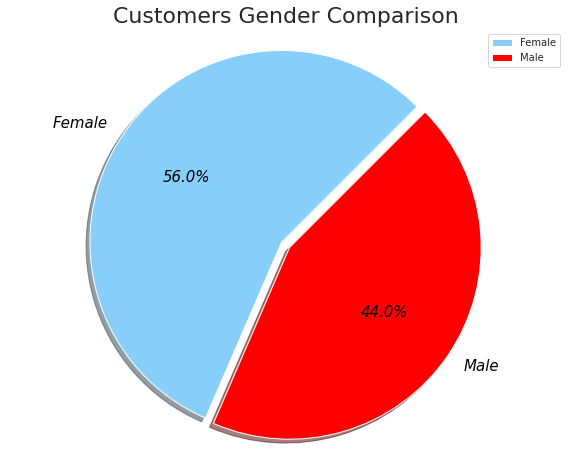

In [12]:
# displaying the pie chart
pie_gender(df, 'Gender')

In [96]:
def age_dist(df, var):

    char,ax = plt.subplots(figsize=(10,8))

    ax = sns.histplot(data=df, y=var, bins = 11, color = 'green')

    ax.set_xlabel('Count', size=18); ax.set_ylabel(var, size = 18)

    ax.set_title(f'Distribution of customer {var}', size = 22)

    for rect in ax.patches:
        ax.text(rect.get_width(),rect.get_y() + rect.get_height()/2, rect.get_width(), weight = 'bold')

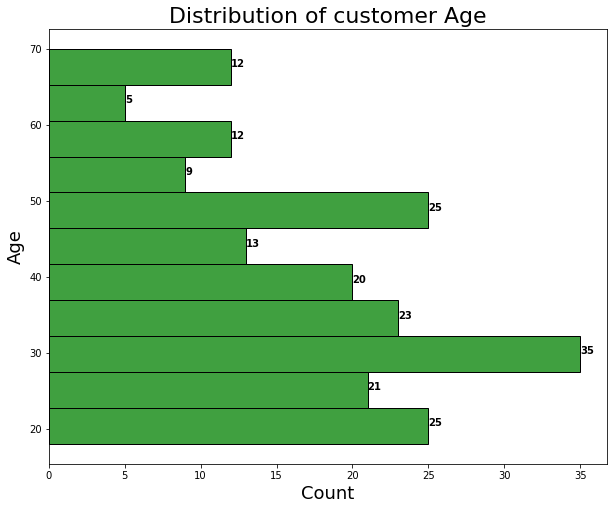

In [97]:
age_dist(df, 'Age')

In [91]:
# kde plot to show the distribution of age per gender

def kde_age(df, var, leg):

    sns.axes_style('whitegrid')

    char,ax = plt.subplots(figsize=(10,8))

    ax = sns.kdeplot(x = var, data = df, hue=leg, multiple='layer')

    ax.set_ylabel('Frequency', size=18)

    ax.set_xlabel(var,size = 18)

    ax.set_title(f'Distribution of Customer {var} per {leg}')

    char.savefig('Distribution.png')

    return


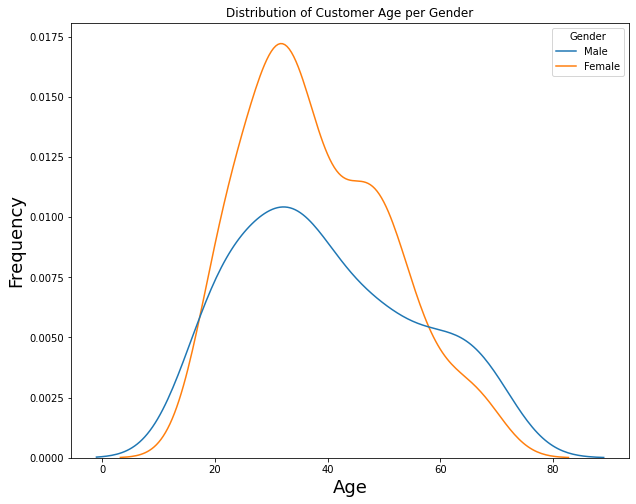

In [64]:
kde_age(df, 'Age', 'Gender')